In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('gm_merge.csv')
# Inspect the data

df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

#scaler1 = MinMaxScaler(feature_range=(0,1))
#scaled_data1 = scaler1.fit_transform(data_date)
# Create the training data set 
# Create the scaled training data set
train_data_date = data_date[0:int(training_data_date), :]

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.49999979, 0.49944143, 0.50502794, 0.50502794, 0.50670385,
       0.50893854, 0.50111734, 0.50558672, 0.5117205 , 0.51005567,
       0.50670385, 0.50558672, 0.50223447, 0.49720675, 0.4953855 ,
       0.49273737, 0.48882677, 0.48770922, 0.48268149, 0.47988802,
       0.47709498, 0.4804468 , 0.48379862, 0.47932967, 0.47709498,
       0.47597743, 0.47932967, 0.48100558, 0.48268149, 0.48100558,
       0.48547496, 0.48603331, 0.48379862, 0.49497206, 0.49329615,
       0.50055857, 0.49854722, 0.49329615, 0.49162024, 0.49050268,
       0.49106146, 0.49217859, 0.48770922, 0.48603331, 0.48268149,
       0.47988802, 0.4804468 , 0.48268149, 0.48100558, 0.47877089,
       0.47262561, 0.48156436, 0.48156436, 0.48268149, 0.48324027,
       0.48491618, 0.49050268, 0.49441328, 0.48603331, 0.48547496])]
[0.48435739831701685]

[array([0.49999979, 0.49944143, 0.50502794, 0.50502794, 0.50670385,
       0.50893854, 0.50111734, 0.50558672, 0.5117205 , 0.51005567,
       0.50670385, 0.50558672, 0.50

In [3]:
#cnn

In [9]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# Train the model
model2.fit(x_train, y_train, batch_size=16, epochs=8)

Epoch 1/8
413/413 [==============================] - 2s 4ms/step - loss: 0.0034
Epoch 2/8
413/413 [==============================] - 1s 3ms/step - loss: 3.0842e-04
Epoch 3/8
413/413 [==============================] - 1s 4ms/step - loss: 3.2046e-04
Epoch 4/8
413/413 [==============================] - 1s 3ms/step - loss: 2.2554e-04
Epoch 5/8
413/413 [==============================] - 2s 4ms/step - loss: 2.5848e-04
Epoch 6/8
413/413 [==============================] - 2s 4ms/step - loss: 2.4334e-04
Epoch 7/8
413/413 [==============================] - 2s 4ms/step - loss: 1.7867e-04
Epoch 8/8
413/413 [==============================] - 1s 4ms/step - loss: 1.8752e-04


In [10]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)

# Get the root mean squared error (RMSE)
rmse_2 = np.sqrt(np.mean(((predictions2 - y_test) ** 2)))
rmse_2

0.14435910277383676

In [11]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:
train = data[:training_data_len]
valid_2 = data[training_data_len:]
valid_2['Predictions2'] = predictions2

mape(valid_2['Close'], valid_2['Predictions2'])

<ipython-input-12-f46f1df8d4ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions2'] = predictions2


0.3490702870602037

In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 59, 64)            192       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 29, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1856)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               185700    
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 185,993
Trainable params: 185,993
Non-trainable params: 0
________________________________________________

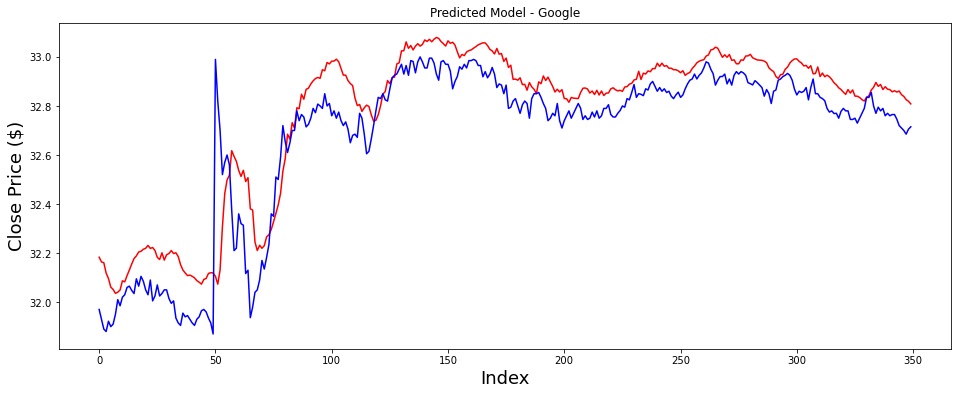

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Predicted Model - Google')
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
#plt.plot(train['Close'], 'b-', label = 'train')
plt.plot(predictions2,'r-', label = 'predict')
plt.plot(y_test,'b-', label = 'actual')
#plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()